In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display dataset info
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [24]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for missing values
print("Missing values in datasets:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Handle missing values (if any)
# Example: Fill missing prices in products
products['Price'] = products['Price'].fillna(products['Price'].median())

# Drop duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

Missing values in datasets:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [25]:
# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='left')
data = data.merge(products, on='ProductID', how='left')

# Preview merged data
print(data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [26]:
# Summary statistics for numerical columns
print(data.describe())

# Frequency distributions
print("Top 5 regions by transactions:")
print(data['Region'].value_counts().head())

print("Top 5 product categories by transactions:")
print(data['Category'].value_counts().head())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

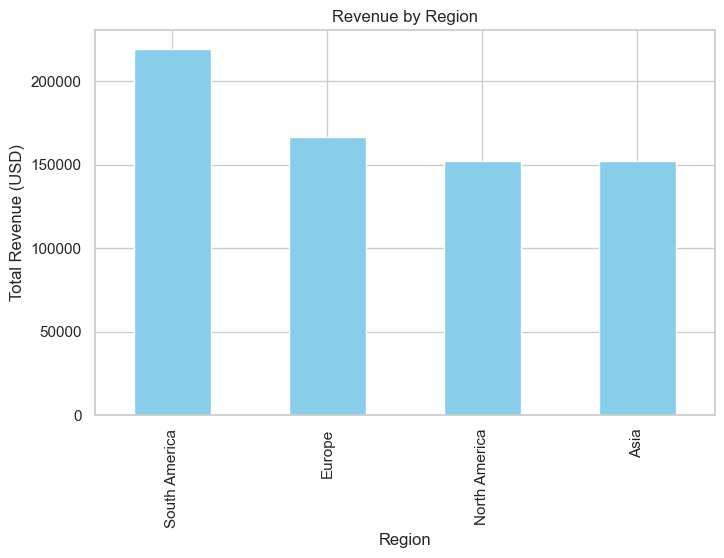

In [27]:
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_revenue.plot(kind='bar', title='Revenue by Region', figsize=(8, 5), color='skyblue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Region')
plt.show()

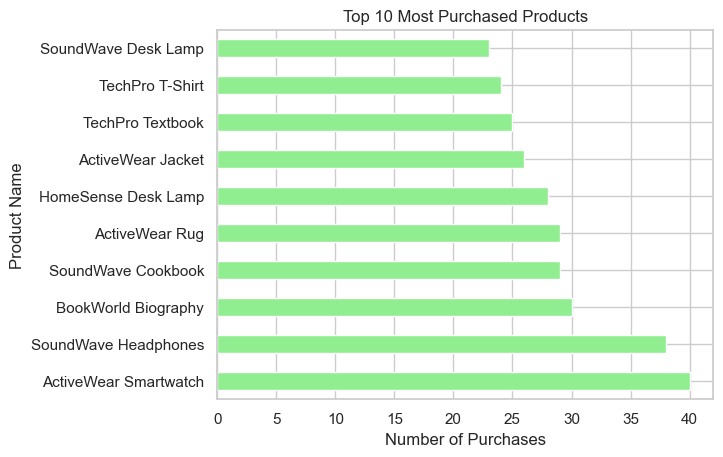

In [28]:
product_popularity = data['ProductName'].value_counts().head(10)
product_popularity.plot(kind='barh', title='Top 10 Most Purchased Products', color='lightgreen')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')
plt.show()

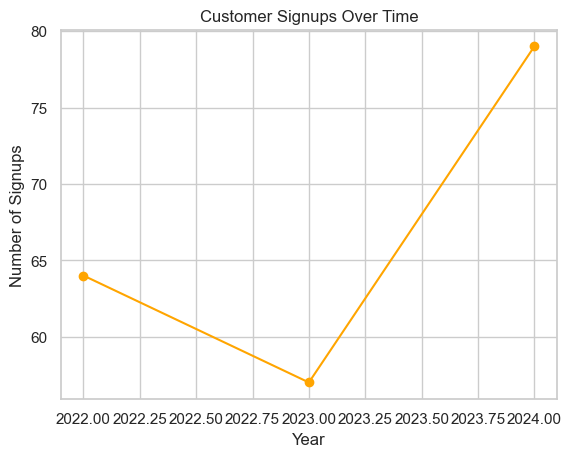

In [29]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signups Over Time', marker='o', color='orange')
plt.ylabel('Number of Signups')
plt.xlabel('Year')
plt.show()

In [30]:
# Insight 1: Top-performing region
top_region = region_revenue.idxmax()
top_revenue = region_revenue.max()
print(f"Insight 1: The top-performing region is {top_region}, generating ${top_revenue:.2f} in revenue.")

# Insight 2: Most popular product
most_popular_product = product_popularity.idxmax()
most_popular_count = product_popularity.max()
print(f"Insight 2: The most popular product is '{most_popular_product}', purchased {most_popular_count} times.")

# Insight 3: Growth in customer signups
most_recent_signup = signup_trends.idxmax()
print(f"Insight 3: Customer signups peaked in {most_recent_signup}.")

# Insight 4: Revenue distribution
avg_transaction_value = data['TotalValue'].mean()
print(f"Insight 4: The average transaction value is ${avg_transaction_value:.2f}.")

# Insight 5: Cross-selling opportunities
cross_selling = data.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
top_category = cross_selling.idxmax()
print(f"Insight 5: The top revenue-generating product category is '{top_category}'.")

Insight 1: The top-performing region is South America, generating $219352.56 in revenue.
Insight 2: The most popular product is 'ActiveWear Smartwatch', purchased 40 times.
Insight 3: Customer signups peaked in 2024.
Insight 4: The average transaction value is $690.00.
Insight 5: The top revenue-generating product category is 'Clothing'.
